In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Path to AAPL data
tickers = ['AAPL', 'AMZN', 'MSFT']
df = {}
for ticker in tickers:
    outname = '{}.csv'.format(ticker)
    outdir = './data/market'
    outdir = os.path.join(outdir, outname)
    fullname = os.path.join(os.path.dirname(os.getcwd()), outdir)
    # Get AAPL Data from the database
    df[ticker] = pd.read_csv(fullname, index_col=0)

In [16]:
import math

# Calculating the strategy momentum indicator
for ticker in tickers:
    df[ticker]['Momentum'] = (0.25 * df[ticker]["Adj Close"].pct_change().shift(1) + 0.25* df[ticker]["Adj Close"].pct_change().shift(2) + 0.25* df[ticker]["Adj Close"].pct_change().shift(3) + 0.25* df[ticker]["Adj Close"].pct_change().shift(4))/(df[ticker]["Adj Close"].pct_change().rolling(10).std()*math.sqrt(4*0.25*0.25))

In [17]:
# Daily returns of the strategy
performance = {}
for ticker in tickers:
    performance[ticker] = df[ticker]["Momentum"].shift(1)/df[ticker]["Adj Close"].shift(1).pct_change().rolling(10).std()*df[ticker]["Adj Close"].pct_change()

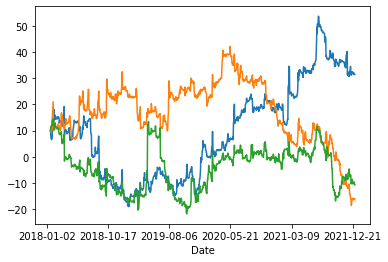

In [18]:
# Cumulative performance of the strategy
for ticker in tickers:
    performance[ticker].cumsum().add(10).plot()

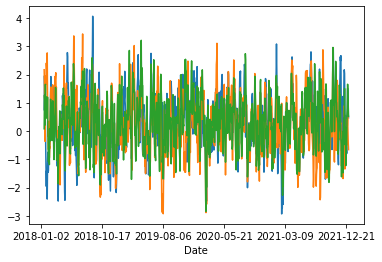

In [19]:
for ticker in tickers:
    df[ticker]["Momentum"].plot()

In [20]:
# Calculate the adfuller test statistic to check for statinarity

from statsmodels.tsa.stattools import adfuller

for ticker in tickers:
    result = adfuller(df[ticker]['Momentum'][10:].values)
    print('{}'.format(ticker))
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('--------------------------')

AAPL
ADF Statistic: -6.974878
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
--------------------------
AMZN
ADF Statistic: -7.239192
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
--------------------------
MSFT
ADF Statistic: -7.773170
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
--------------------------


In [27]:
df['AAPL']['Momentum'].max()
df['AAPL']['Momentum'].min()

-2.9301233214434768